<a href="https://colab.research.google.com/github/1995subhankar1995/Torch-Tutorials/blob/main/Torch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

class Calculation():
  def __init__(self, x, y):
    self.x = x
    self.y = y
   

  def add(self, z):
    return self.x + self.y + z

ha = Calculation(10, 3)
print(ha.add(-8))

5


In [ ]:
class Matrix():
  def __init__(self, X, y, lr, W):
    self.X = X
    self.y = y
    self.lr = lr
    self.W = W

  def Cost(self):
    self.W = self.W - self.lr * (np.matmul(np.matmul(np.transpose(self.X), self.X), self.W) - np.matmul(np.transpose(X), y))
    cost = np.linalg.norm(np.matmul(self.X, self.W) - y)
    return self.W, cost

  def predict(self, X1):
    print(self.W, 'W2')
    prediction = np.matmul(X1, self.W)
    return prediction

# Tensor Basics
# Tutorial 2

In [ ]:
y = np.array([[1], [0], [1], [1], [0]])
X = np.random.normal(size = (5, 3))
W = np.random.randn(3, 1)
print(W, 'W1', np.transpose(X))
b = np.array([[1, 1, 2, 4, 3]])

ha = Matrix(X, y, 0.01, W)
for j in range(10):
  W, cost  = ha.Cost()
  print(W, 'j11', j, cost)

x1 = np.random.randn(7, 3)
prediction = ha.predict(x1)


for j in range(10):
  print(W, 'W3')
  W, cost  = ha.Cost()
  print(W, 'j22', j, cost)

[[-0.61982586]
 [ 0.26774549]
 [ 0.32291553]] W1 [[-0.84530505 -0.55352138  0.28509478  0.51716962 -2.18263075]
 [ 0.66467791  1.85608159  1.19311702 -0.57472103  0.18889198]
 [ 1.53701543 -0.3695089   0.84152021  0.64319889 -1.55757081]]
[[-0.58628661]
 [ 0.25105546]
 [ 0.34963202]] j11 0 1.706787013363352
[[-0.55590015]
 [ 0.23578914]
 [ 0.37388074]] j11 1 1.6063440331477408
[[-0.52837421]
 [ 0.22182062]
 [ 0.39589202]] j11 2 1.5185994264655784
[[-0.50344353]
 [ 0.20903534]
 [ 0.41587469]] j11 3 1.4422923572107897
[[-0.48086739]
 [ 0.19732902]
 [ 0.43401809]] j11 4 1.376236361341479
[[-0.46042732]
 [ 0.18660673]
 [ 0.45049391]] j11 5 1.319317062911159
[[-0.44192503]
 [ 0.17678204]
 [ 0.46545778]] j11 6 1.2704922147058129
[[-0.42518059]
 [ 0.16777627]
 [ 0.47905083]] j11 7 1.2287931858850478
[[-0.4100307 ]
 [ 0.15951778]
 [ 0.49140099]] j11 8 1.193326950584961
[[-0.39632715]
 [ 0.15194131]
 [ 0.50262424]] j11 9 1.163277716432885
[[-0.39632715]
 [ 0.15194131]
 [ 0.50262424]] W2
[[-0.39

In [ ]:
import torch

a = torch.randn(3, requires_grad = True)
print(a, 'a')
b = a.mean()
print(b, 'b')
b.backward() # db/da
print(a.grad, 'grad')

tensor([2.0076, 0.9647, 3.3311], requires_grad=True) a
tensor(2.1011, grad_fn=<MeanBackward0>) b
tensor([0.3333, 0.3333, 0.3333]) grad


# Detach from gradient

In [ ]:
x = torch.randn(5, requires_grad = True)

print(x)
#x.requires_grad_(False)
#x.detach()
#with torch.no_grad():
#x.requires_grad_(False)
with torch.no_grad():
  y = x + 11
print(y)

tensor([-1.1019,  1.0680,  0.1440, -1.3743, -0.0349], requires_grad=True)
tensor([ 9.8981, 12.0680, 11.1440,  9.6257, 10.9651])


# Gradient Calculation with autograd
# Tutorial 3

In [ ]:
x = torch.ones(4, requires_grad = True)

for epoch in range(3):
  model_output = (x * 3).sum()
  model_output.backward()
  print(x.grad) # gradients are accumulating each time

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [ ]:
x = torch.ones(4, requires_grad = True)

for epoch in range(3):
  model_output = (x * 3).sum()
  model_output.backward()
  print(x.grad) # gradients are accumulating each time

  x.grad.zero_() #gradients will not accumulate

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
x = torch.tensor([1.0, 2.0])
y = torch.tensor(1)
w = torch.tensor([-1.0, 1.2], requires_grad = True)

loss = (torch.matmul(x, w) - y)**2
print(loss, 'loss')
loss.backward()

print(w.grad)

tensor(0.1600, grad_fn=<PowBackward0>) loss
tensor([0.8000, 1.6000])


# Gradient Descent with autograd
# Tutorial 5

In [ ]:
import numpy as np
class MODEL():
  def __init__(self, X, y, w):
    self.X = X
    self.y = y
    self.w = w
    print(self.w, 'init_w')

  def forward(self):
    print(self.w, 'forward_w')
    return np.matmul(self.X, self.w)

  def loss(self, y_pred, y_act):
    print(self.w, 'loss_w')
    return np.mean((y_act - y_pred)**2)

  def Gradient(self, y_pred):
    print(self.w, 'grad_w')
    return np.matmul(np.transpose(self.X), np.array(np.matmul(self.X, self.w) - y_pred))


X = np.array([[2, 3, 4], [1, 2, 4]])
y = np.array([[1], [-1]])
w = np.array([[2], [3], [1]])
lr = 0.01
predictions = np.matmul(X, w)
print(predictions, 'predictions0')
print(w, 'w')
for i in range(4):
  cal = MODEL(X, y, w)
  y_pred = cal.forward() 
  #print(y_pred, 'y_pred', i)
  Loss = cal.loss(y_pred, y)
  print(Loss, 'Loss', i)
  grad = cal.Gradient(y)
  #print(grad, 'grad')

  w = w - lr * grad
  #print(w, 'w', i)

X = np.array([[4, 3, 1], [1, 0, -1]])
y = np.array([[1], [-1]])
#w = np.array([0])
predictions = np.matmul(X, w)
print(predictions, 'predictions1')

print('next')
for i in range(500):
  calcu = MODEL(X, y, w)
  y_pred = calcu.forward()
  Loss = calcu.loss(y_pred, y)
  print(Loss, 'Loss', i)
  grad = calcu.Gradient(y)
  w = w - lr * grad
predictions = np.matmul(X, w)
print(predictions, 'predictions2')


Streaming output truncated to the last 5000 lines.
 [-0.02732329]] loss_w
0.06756454989105852 Loss 115
[[-0.6624784 ]
 [ 1.21077414]
 [-0.02732329]] grad_w
[[-0.66433027]
 [ 1.21212158]
 [-0.02322569]] init_w
[[-0.66433027]
 [ 1.21212158]
 [-0.02322569]] forward_w
[[-0.66433027]
 [ 1.21212158]
 [-0.02322569]] loss_w
0.06537898874136457 Loss 116
[[-0.66433027]
 [ 1.21212158]
 [-0.02322569]] grad_w
[[-0.66615194]
 [ 1.21344704]
 [-0.01919492]] init_w
[[-0.66615194]
 [ 1.21344704]
 [-0.01919492]] forward_w
[[-0.66615194]
 [ 1.21344704]
 [-0.01919492]] loss_w
0.06326412557673455 Loss 117
[[-0.66615194]
 [ 1.21344704]
 [-0.01919492]] grad_w
[[-0.66794391]
 [ 1.21475089]
 [-0.01522987]] init_w
[[-0.66794391]
 [ 1.21475089]
 [-0.01522987]] forward_w
[[-0.66794391]
 [ 1.21475089]
 [-0.01522987]] loss_w
0.061217673476442074 Loss 118
[[-0.66794391]
 [ 1.21475089]
 [-0.01522987]] grad_w
[[-0.66970666]
 [ 1.21603347]
 [-0.01132949]] init_w
[[-0.66970666]
 [ 1.21603347]
 [-0.01132949]] forward_w
[[

In [ ]:
import torch

class MODEL():
  def __init__(self, X, y, w):
    self.X = X
    self.y = y
    self.w = w
    print(self.w, 'init_w')

  def forward(self):
    print(self.w, 'forward_w')
    return torch.matmul(self.X, self.w)

  def loss(self, y_pred, y_act):
    print(self.w, 'loss_w')
    return torch.mean((y_act - y_pred)**2)


X = torch.tensor([[2, 3, 4], [1, 2, 4]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
w = torch.tensor([[2], [3], [1]], dtype = torch.float32, requires_grad = True)
lr = 0.01

predictions = torch.matmul(X, w)
print(predictions, 'predictions1')

for i in range(4):
  cal = MODEL(X, y, w)
  y_pred = cal.forward()
  Loss = cal.loss(y, y_pred)
  print(Loss, 'Loss')
  Loss.backward()
  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

X = torch.tensor([[4, 3, 1], [1, 0, -1]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
#w = np.array([0])
predictions = torch.matmul(X, w)
print(predictions, 'predictions1')

print('next')
for i in range(500):
  calcu = MODEL(X, y, w)
  y_pred = calcu.forward()
  Loss = calcu.loss(y_pred, y)
  print(Loss, 'Loss', i)
  Loss.backward()  
  with torch.no_grad():
    w -= lr * w.grad
  w.grad.zero_()

predictions = torch.matmul(X, w)
print(predictions, 'predictions2')


Streaming output truncated to the last 5000 lines.
tensor([[ 1.1433],
        [ 1.5952],
        [-1.1924]], requires_grad=True) forward_w
tensor([[ 1.1433],
        [ 1.5952],
        [-1.1924]], requires_grad=True) loss_w
tensor(31.2418, grad_fn=<MeanBackward0>) Loss 0
tensor([[ 0.8233],
        [ 1.3802],
        [-1.2307]], requires_grad=True) init_w
tensor([[ 0.8233],
        [ 1.3802],
        [-1.2307]], requires_grad=True) forward_w
tensor([[ 0.8233],
        [ 1.3802],
        [-1.2307]], requires_grad=True) loss_w
tensor(18.1992, grad_fn=<MeanBackward0>) Loss 1
tensor([[ 0.5846],
        [ 1.2241],
        [-1.2522]], requires_grad=True) init_w
tensor([[ 0.5846],
        [ 1.2241],
        [-1.2522]], requires_grad=True) forward_w
tensor([[ 0.5846],
        [ 1.2241],
        [-1.2522]], requires_grad=True) loss_w
tensor(11.0874, grad_fn=<MeanBackward0>) Loss 2
tensor([[ 0.4059],
        [ 1.1114],
        [-1.2614]], requires_grad=True) init_w
tensor([[ 0.4059],
        [ 1.

In [ ]:
#1) Design model(input, output size, forward pass)
#2) compute loss, optimizer
#3)Training loop
  # forward pass(compute prediction)
  # backward pass(compute gradients and update weights)


import torch
import torch.nn as nn

class MODEL():
  def __init__(self, X, y, w):
    self.X = X
    self.y = y
    self.w = w
    print(self.w, 'init_w')

  def forward(self):
    print(self.w, 'forward_w')
    return torch.matmul(self.X, self.w)



X = torch.tensor([[2, 3, 4], [1, 2, 4]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
w = torch.tensor([[2], [3], [1]], dtype = torch.float32, requires_grad = True)
lr = 0.01

predictions = torch.matmul(X, w)
print(predictions, 'predictions1')

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = lr)

for i in range(4):
  cal = MODEL(X, y, w)
  y_pred = cal.forward()
  Loss = loss(y_pred, y)

  Loss.backward()
  optimizer.step()
  optimizer.zero_grad()

X = torch.tensor([[4, 3, 1], [1, 0, -1]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
#w = np.array([0])
predictions = torch.matmul(X, w)
print(predictions, 'predictions1')

print('next')
for i in range(500):
  calcu = MODEL(X, y, w)
  y_pred = calcu.forward()
  Loss = loss(y_pred, y)
  print(Loss, 'Loss', i)
  Loss.backward()  
  optimizer.step()
  optimizer.zero_grad()

predictions = torch.matmul(X, w)
print(predictions, 'predictions2')

tensor([[17.],
        [12.]], grad_fn=<MmBackward>) predictions1
tensor([[2.],
        [3.],
        [1.]], requires_grad=True) init_w
tensor([[2.],
        [3.],
        [1.]], requires_grad=True) forward_w
tensor([[ 1.5500],
        [ 2.2600],
        [-0.1600]], requires_grad=True) init_w
tensor([[ 1.5500],
        [ 2.2600],
        [-0.1600]], requires_grad=True) forward_w
tensor([[ 1.3209],
        [ 1.8842],
        [-0.7468]], requires_grad=True) init_w
tensor([[ 1.3209],
        [ 1.8842],
        [-0.7468]], requires_grad=True) forward_w
tensor([[ 1.2037],
        [ 1.6929],
        [-1.0432]], requires_grad=True) init_w
tensor([[ 1.2037],
        [ 1.6929],
        [-1.0432]], requires_grad=True) forward_w
tensor([[8.1664],
        [2.3357]], grad_fn=<MmBackward>) predictions1
next
tensor([[ 1.1433],
        [ 1.5952],
        [-1.1924]], requires_grad=True) init_w
tensor([[ 1.1433],
        [ 1.5952],
        [-1.1924]], requires_grad=True) forward_w
tensor(31.2418, grad_f

In [ ]:
#1) Design model(input, output size, forward pass)
#2) compute loss, optimizer
#3)Training loop
  # forward pass(compute prediction)
  # backward pass(compute gradients and update weights)


import torch
import torch.nn as nn


X = torch.tensor([[2, 3, 4], [1, 2, 4]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
lr = 0.01

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

MODEL = nn.Linear(input_size, 1)

predictions = MODEL(X)
print(predictions, 'predictions1')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(MODEL.parameters(), lr = lr)
[w, b] = MODEL.parameters()
print(w, 'w1', b, 'b1')
for i in range(4):
  y_pred = MODEL(X)
  Loss = loss(y_pred, y)

  Loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if i % 3 == 0:
    [w, b] = MODEL.parameters()

    print(w, 'w', b, 'b', i, 'i', Loss)

X = torch.tensor([[4, 3, 1], [1, 0, -1]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
#w = np.array([0])
predictions = MODEL(X)
print(predictions, 'predictions1')

print('next')
[w, b] = MODEL.parameters()
print(w, 'w', b, 'MODEL.parameters()')
for i in range(500):
  y_pred = MODEL(X)
  Loss = loss(y_pred, y)
  #print(Loss, 'Loss', i)
  Loss.backward()  
  optimizer.step()
  optimizer.zero_grad()
  if i % 10 == 0:
    [w, b] = MODEL.parameters()

    print(w, 'w', b, 'b', i, 'i', Loss)

predictions = MODEL(X)
print(predictions, 'predictions2')

tensor([[-1.4191],
        [-1.2427]], grad_fn=<AddmmBackward>) predictions1
Parameter containing:
tensor([[-0.2342,  0.0577, -0.2614]], requires_grad=True) w1 Parameter containing:
tensor([-0.0783], requires_grad=True) b1
Parameter containing:
tensor([[-0.1834,  0.1352, -0.1549]], requires_grad=True) w Parameter containing:
tensor([-0.0517], requires_grad=True) b 0 i tensor(2.9555, grad_fn=<MseLossBackward>)
Parameter containing:
tensor([[-0.1250,  0.2126, -0.0788]], requires_grad=True) w Parameter containing:
tensor([-0.0327], requires_grad=True) b 3 i tensor(0.9471, grad_fn=<MseLossBackward>)
tensor([[ 0.0266],
        [-0.0789]], grad_fn=<AddmmBackward>) predictions1
next
Parameter containing:
tensor([[-0.1250,  0.2126, -0.0788]], requires_grad=True) w Parameter containing:
tensor([-0.0327], requires_grad=True) MODEL.parameters()
Parameter containing:
tensor([[-0.0952,  0.2418, -0.0598]], requires_grad=True) w Parameter containing:
tensor([-0.0321], requires_grad=True) b 0 i tensor

# Linear Regression
# tutorial 7

In [ ]:
#1) Design model(input, output size, forward pass)
#2) compute loss, optimizer
#3)Training loop
  # forward pass(compute prediction)
  # backward pass(compute gradients and update weights)


import torch
import torch.nn as nn


X = torch.tensor([[2, 3, 4], [1, 2, 4]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
lr = 0.01

n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

#MODEL = nn.Linear(input_size, 1)
class LinearRegression(nn.Module):
  def __init__(self, input_dim, out_dim):
    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, out_dim)

  def forward(self, X):
    return self.lin(X)


MODEL = LinearRegression(input_size, 1)



predictions = MODEL(X)
print(predictions, 'predictions1')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(MODEL.parameters(), lr = lr)
[w, b] = MODEL.parameters()
print(w, 'w1', b, 'b1')
for i in range(4):
  y_pred = MODEL(X)
  Loss = loss(y_pred, y)

  Loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if i % 3 == 0:
    [w, b] = MODEL.parameters()

    print(w, 'w', b, 'b', i, 'i', Loss)

X = torch.tensor([[4, 3, 1], [1, 0, -1]], dtype = torch.float32)
y = torch.tensor([[1], [-1]], dtype = torch.float32)
#w = np.array([0])
predictions = MODEL.forward(X)
print(predictions, 'predictions1')

print('next')
[w, b] = MODEL.parameters()
print(w, 'w', b, 'MODEL.parameters()')
for i in range(500):
  y_pred = MODEL(X)
  Loss = loss(y_pred, y)
  #print(Loss, 'Loss', i)
  Loss.backward()  
  optimizer.step()
  optimizer.zero_grad()
  if i % 10 == 0:
    [w, b] = MODEL.parameters()

    print(w, 'w', b, 'b', i, 'i', Loss)

predictions = MODEL.forward(X)
print(predictions, 'predictions2')

tensor([[0.2498],
        [0.9619]], grad_fn=<AddmmBackward>) predictions1
Parameter containing:
tensor([[-0.4695, -0.2426,  0.5339]], requires_grad=True) w1 Parameter containing:
tensor([-0.2191], requires_grad=True) b1
Parameter containing:
tensor([[-0.4741, -0.2594,  0.4855]], requires_grad=True) w Parameter containing:
tensor([-0.2312], requires_grad=True) b 0 i tensor(2.2060, grad_fn=<MseLossBackward>)
Parameter containing:
tensor([[-0.4555, -0.2556,  0.4260]], requires_grad=True) w Parameter containing:
tensor([-0.2461], requires_grad=True) b 3 i tensor(1.8839, grad_fn=<MseLossBackward>)
tensor([[-2.4087],
        [-1.1275]], grad_fn=<AddmmBackward>) predictions1
next
Parameter containing:
tensor([[-0.4555, -0.2556,  0.4260]], requires_grad=True) w Parameter containing:
tensor([-0.2461], requires_grad=True) MODEL.parameters()
Parameter containing:
tensor([[-0.3178, -0.1533,  0.4588]], requires_grad=True) w Parameter containing:
tensor([-0.2107], requires_grad=True) b 0 i tensor(5

epoch: 1, loss: 5661.8892
epoch: 11, loss: 4191.8594
epoch: 21, loss: 3130.1287
epoch: 31, loss: 2362.3770
epoch: 41, loss: 1806.5892
epoch: 51, loss: 1403.8298
epoch: 61, loss: 1111.6871
epoch: 71, loss: 899.5934
epoch: 81, loss: 745.4899
epoch: 91, loss: 633.4370
epoch: 101, loss: 551.9041
epoch: 111, loss: 492.5417
epoch: 121, loss: 449.2953
epoch: 131, loss: 417.7733
epoch: 141, loss: 394.7861
epoch: 151, loss: 378.0152
epoch: 161, loss: 365.7748
epoch: 171, loss: 356.8378
epoch: 181, loss: 350.3103
epoch: 191, loss: 345.5413
epoch: 201, loss: 342.0561
epoch: 211, loss: 339.5084
epoch: 221, loss: 337.6456
epoch: 231, loss: 336.2833
epoch: 241, loss: 335.2870
epoch: 251, loss: 334.5579
epoch: 261, loss: 334.0246
epoch: 271, loss: 333.6342
epoch: 281, loss: 333.3485
epoch: 291, loss: 333.1394
epoch: 301, loss: 332.9863
epoch: 311, loss: 332.8742
epoch: 321, loss: 332.7921
epoch: 331, loss: 332.7320
epoch: 341, loss: 332.6880
epoch: 351, loss: 332.6558
epoch: 361, loss: 332.6322
epoch

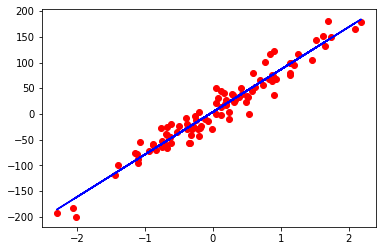

In [ ]:
import  numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

x_np, y_np = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(x_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))
y = y.view(-1, 1)
n_samples, n_features = X.shape

input_size = n_features
output_size = 1
class LinearReg(nn.Module):
  def __init__(self, input_dim, out_dim):
    super(LinearReg, self).__init__()
    self.input_dim = input_dim
    self.out_dim = out_dim
    self.lin1 = nn.Linear(self.input_dim, self.out_dim)

  def forward(self, X):
    return self.lin1(X)

model = LinearReg(input_size, output_size)
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for i in range(500):
  y_pred = model(X)
  #print(y.shape)
  loss = criterion(y, y_pred)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if i % 10 == 0:
    print(f'epoch: {i + 1}, loss: {loss.item():.4f}')

predicted = model(X).detach().numpy()

plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()

# Logistics Regression
# Tutorial 8

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))


y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)
lr = 0.01

class LogisticRegression(nn.Module):
  def __init__(self, input_size):
    super(LogisticRegression, self).__init__()
    self.input_size = input_size
    self.lin1 = nn.Linear(self.input_size, 1)

  def forward(self, X):
    y_pred = torch.sigmoid(self.lin1(X))
    return y_pred

model = LogisticRegression(n_features)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

for i in range(500):
  y_pred = model(X_train)
  loss = criterion(y_train, y_pred)

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()

with torch.no_grad():
  pred = model(X_test)
  pred_class = pred.round()
  acc = (torch.sum(pred_class == y_test)/float(len(y_test))) * 100
  print(f'Accuracy:{acc:.4f}')



Accuracy:95.6140


# Datasets and Dataloader
# Tutorial 9


1 epoch = one complete forward and backward pass for the whole training data\
batch size = no of training examples for one complete forward and backward pass\
number of iterations = number of passe per epoch\
e.g 100 training examples, 20 batch size, so no of iterations = 100/20 = 5 per each epoch

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

data_path = '/content/drive/My Drive/Colab Notebooks/wine.csv'
batch_size = 4

class Winedata():
  def __init__(self, data_path):
    data = np.loadtxt(data_path, delimiter = ',', dtype = np.float32, skiprows = 1)
    self.x = torch.from_numpy(data[:, 1:])
    self.y = torch.from_numpy(data[:, 0])
    self.n_samples = data.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples
dataset = Winedata(data_path)
features, labels = dataset[0]
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
n_samples = len(dataset)
n_epochs = 8
n_iter = math.ceil(n_samples/batch_size)
for e in range(n_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if (i + 1) % 5 == 0:
      print(f'epoch {e + 1}/{n_epochs}, steps {i + 1}/{n_iter}, inputs {inputs.shape}') 

epoch 1/8, steps 5/45, inputs torch.Size([4, 13])
epoch 1/8, steps 10/45, inputs torch.Size([4, 13])
epoch 1/8, steps 15/45, inputs torch.Size([4, 13])
epoch 1/8, steps 20/45, inputs torch.Size([4, 13])
epoch 1/8, steps 25/45, inputs torch.Size([4, 13])
epoch 1/8, steps 30/45, inputs torch.Size([4, 13])
epoch 1/8, steps 35/45, inputs torch.Size([4, 13])
epoch 1/8, steps 40/45, inputs torch.Size([4, 13])
epoch 1/8, steps 45/45, inputs torch.Size([2, 13])
epoch 2/8, steps 5/45, inputs torch.Size([4, 13])
epoch 2/8, steps 10/45, inputs torch.Size([4, 13])
epoch 2/8, steps 15/45, inputs torch.Size([4, 13])
epoch 2/8, steps 20/45, inputs torch.Size([4, 13])
epoch 2/8, steps 25/45, inputs torch.Size([4, 13])
epoch 2/8, steps 30/45, inputs torch.Size([4, 13])
epoch 2/8, steps 35/45, inputs torch.Size([4, 13])
epoch 2/8, steps 40/45, inputs torch.Size([4, 13])
epoch 2/8, steps 45/45, inputs torch.Size([2, 13])
epoch 3/8, steps 5/45, inputs torch.Size([4, 13])
epoch 3/8, steps 10/45, inputs tor

# Dataset Transform
# Tutorial 10

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

data_path = '/content/drive/My Drive/Colab Notebooks/wine.csv'
batch_size = 4

class Winedata():
  def __init__(self, data_path, transform = None):
    data = np.loadtxt(data_path, delimiter = ',', dtype = np.float32, skiprows = 1)
    self.x = np.array(data[:, 1:])
    self.y = np.array(data[:, [0]])
    self.n_samples = data.shape[0]
    self.transform = transform

  def __getitem__(self, index):
    sample =  self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.n_samples

class ToTensor():
  def __call__(self, sample):
    inputs, labels = sample
    return torch.from_numpy(inputs), torch.from_numpy(labels)

class MullTensor():
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, labels = sample
    inputs *= self.factor
    return inputs, labels

dataset = Winedata(data_path, transform = ToTensor())
firstdata = dataset[0]
inputs, labels = firstdata
print(inputs, labels)

dataset = Winedata(data_path, transform = MullTensor(2))
firstdata = dataset[0]
inputs, labels = firstdata
print(inputs, labels)

composed = torchvision.transforms.Compose([ToTensor(), MullTensor(3)])
dataset = Winedata(data_path, transform = composed)
firstdata = dataset[0]
inputs, labels = firstdata
print(type(inputs), type(labels))


features, labels = dataset[0]
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 2)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
n_samples = len(dataset)
n_epochs = 8
n_iter = math.ceil(n_samples/batch_size)
for e in range(n_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if (i + 1) % 5 == 0:
      print(f'epoch {e + 1}/{n_epochs}, steps {i + 1}/{n_iter}, inputs {inputs.shape}') 

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
[2.846e+01 3.420e+00 4.860e+00 3.120e+01 2.540e+02 5.600e+00 6.120e+00
 5.600e-01 4.580e+00 1.128e+01 2.080e+00 7.840e+00 2.130e+03] [1.]
<class 'torch.Tensor'> <class 'torch.Tensor'>
epoch 1/8, steps 5/45, inputs torch.Size([4, 13])
epoch 1/8, steps 10/45, inputs torch.Size([4, 13])
epoch 1/8, steps 15/45, inputs torch.Size([4, 13])
epoch 1/8, steps 20/45, inputs torch.Size([4, 13])
epoch 1/8, steps 25/45, inputs torch.Size([4, 13])
epoch 1/8, steps 30/45, inputs torch.Size([4, 13])
epoch 1/8, steps 35/45, inputs torch.Size([4, 13])
epoch 1/8, steps 40/45, inputs torch.Size([4, 13])
epoch 1/8, steps 45/45, inputs torch.Size([2, 13])
epoch 2/8, steps 5/45, inputs torch.Size([4, 13])
epoch 2/8, steps 10/45, inputs torch.Size([4, 13])
epoch 2/8, steps 15/45, inputs torch.Size([4, 13])
epoch 2/8, s

# Lecture 13
# Feed Forward NN

In [ ]:
import torch 
import torch.nn as nn
import numpy as np

class NN(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    super(NN, self).__init__()
    self.lin1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(self.hidden_size, self.output_size)

  def forward(self, x):
    out = self.lin1(x)
    out = self.relu(out)
    out = self.lin2(out)

    y_pred = torch.sigmoid(out)
    return y_pred

model = NN(28*28, 1, 5)
criterion = nn.MSELoss()
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
X = torch.randn((6, 28*28), dtype = torch.float32)
y = torch.tensor([1, 0, 0, 1, 1, 0])
y_pred = model.forward(X)
print(y_pred, 'y_pred1')

for i in range(501):
  y_pred = model.forward(X)
  loss = criterion(y, y_pred)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  #print(loss, 'loss', i)
  if i % 100 == 0:
    j = 0
    for p in model.parameters():
      print(p.name, 'a', p.data,'j', j, 'shape', p.data.shape)
      j = j + 1
y_pred = model.forward(X)
print(y_pred, 'y_pred2')
print('next')
X = torch.randn((6, 28*28), dtype = torch.float32)

## Parameters are reinitialized below
j = 0
for p in model.parameters():
  if j == 0:
    p.data = torch.randn(5, 784)
  if j == 1:
    p.data = torch.randn(5)
  if j == 2:
    p.data = torch.randn(1, 5)
  if j == 3:
    p.data = torch.randn(1)
  j += 1

## If weights are not reinitialized above, It will start updating weights from the point where it stopped 
## during last optimization.  
X = torch.randn((6, 28*28), dtype = torch.float32)

for i in range(101):
  y_pred = model.forward(X)
  loss = criterion(y, y_pred)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  #print(loss, 'loss', i)
  if i % 10 == 0:
    j = 0
    for p in model.parameters():
      print(p.name, 'a', p.data,'j', j, 'shape', p.data.shape)
      j = j + 1
y_pred = model.forward(X)
print(y_pred, 'y_pred2')

tensor([[0.6167],
        [0.5987],
        [0.5593],
        [0.5434],
        [0.5986],
        [0.6372]], grad_fn=<SigmoidBackward>) y_pred1
None a tensor([[ 0.0109,  0.0270,  0.0238,  ..., -0.0089,  0.0096, -0.0269],
        [-0.0330, -0.0210, -0.0148,  ...,  0.0310,  0.0184,  0.0304],
        [ 0.0290,  0.0054, -0.0219,  ...,  0.0256,  0.0272, -0.0304],
        [ 0.0288, -0.0300, -0.0070,  ..., -0.0252,  0.0039,  0.0105],
        [-0.0345,  0.0197,  0.0087,  ..., -0.0041,  0.0148,  0.0090]]) j 0 shape torch.Size([5, 784])
None a tensor([-0.0149, -0.0329,  0.0054,  0.0267,  0.0272]) j 1 shape torch.Size([5])
None a tensor([[-0.1455,  0.2431, -0.1270,  0.1779,  0.2200]]) j 2 shape torch.Size([1, 5])
None a tensor([0.3807]) j 3 shape torch.Size([1])
None a tensor([[ 0.0109,  0.0270,  0.0235,  ..., -0.0085,  0.0096, -0.0264],
        [-0.0330, -0.0211, -0.0146,  ...,  0.0307,  0.0186,  0.0300],
        [ 0.0290,  0.0055, -0.0221,  ...,  0.0260,  0.0272, -0.0300],
        [ 0.0288, -0.

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


None a tensor([[ 0.0109,  0.0272,  0.0230,  ..., -0.0076,  0.0096, -0.0253],
        [-0.0329, -0.0212, -0.0141,  ...,  0.0300,  0.0189,  0.0293],
        [ 0.0291,  0.0056, -0.0226,  ...,  0.0268,  0.0272, -0.0290],
        [ 0.0288, -0.0301, -0.0064,  ..., -0.0257,  0.0039,  0.0099],
        [-0.0337,  0.0198,  0.0092,  ..., -0.0054,  0.0145,  0.0081]]) j 0 shape torch.Size([5, 784])
None a tensor([-0.0137, -0.0334,  0.0065,  0.0261,  0.0255]) j 1 shape torch.Size([5])
None a tensor([[-0.1510,  0.2427, -0.1320,  0.1752,  0.2181]]) j 2 shape torch.Size([1, 5])
None a tensor([0.3664]) j 3 shape torch.Size([1])
None a tensor([[ 0.0109,  0.0272,  0.0229,  ..., -0.0073,  0.0096, -0.0250],
        [-0.0329, -0.0212, -0.0141,  ...,  0.0300,  0.0189,  0.0293],
        [ 0.0291,  0.0056, -0.0227,  ...,  0.0271,  0.0272, -0.0287],
        [ 0.0288, -0.0301, -0.0063,  ..., -0.0257,  0.0039,  0.0099],
        [-0.0336,  0.0198,  0.0093,  ..., -0.0055,  0.0145,  0.0080]]) j 0 shape torch.Size([5,

In [11]:
import torch 
import torch.nn as nn
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
class NN(nn.Module):
  def __init__(self, input_size, output_size, hidden_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    super(NN, self).__init__()
    self.lin1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.lin2 = nn.Linear(self.hidden_size, self.output_size)

  def forward(self, x):
    out = self.lin1(x)
    out = self.relu(out)
    out = self.lin2(out)

    y_pred = torch.sigmoid(out)
    return y_pred

model = NN(28*28, 1, 5)
criterion = nn.MSELoss()
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
X = torch.randn((6, 28*28), dtype = torch.float32)
y = torch.tensor([1, 0, 0, 1, 1, 0])
y_pred = model.forward(X)
print(y_pred, 'y_pred1')

for i in range(11):
  y_pred = model.forward(X)
  loss = criterion(y, y_pred)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  print(loss, 'loss', i)
  '''
  if i % 100 == 0:
    j = 0
    for p in model.parameters():
      print(p.name, 'a', p.data,'j', j, 'shape', p.data.shape)
      j = j + 1
  '''
y_pred = model.forward(X)
print(y_pred, 'y_pred2')
print('next')
X = torch.randn((6, 28*28), dtype = torch.float32)

## Parameters are reinitialized below
j = 0
for p in model.parameters():
  if j == 0:
    p.data = torch.randn(5, 784)
  if j == 1:
    p.data = torch.randn(5)
  if j == 2:
    p.data = torch.randn(1, 5)
  if j == 3:
    p.data = torch.randn(1)
  j += 1

## If weights are not reinitialized above, It will start updating weights from the point where it stopped 
## during last optimization.  
X = torch.randn((6, 28*28), dtype = torch.float32)
for i in range(11):
  y_pred = model.forward(X)
  loss = criterion(y, y_pred)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  print(loss, 'loss', i)
  '''
  if i % 10 == 0:
    j = 0
    for p in model.parameters():
      print(p.name, 'a', p.data,'j', j, 'shape', p.data.shape)
      j = j + 1
  '''
y_pred = model.forward(X)
print(y_pred, 'y_pred2')

tensor([[0.3865],
        [0.4351],
        [0.4517],
        [0.4260],
        [0.3941],
        [0.3327]], grad_fn=<SigmoidBackward>) y_pred1
tensor(0.2607, grad_fn=<MeanBackward0>) loss 0
tensor(0.2606, grad_fn=<MeanBackward0>) loss 1
tensor(0.2606, grad_fn=<MeanBackward0>) loss 2
tensor(0.2605, grad_fn=<MeanBackward0>) loss 3
tensor(0.2605, grad_fn=<MeanBackward0>) loss 4
tensor(0.2605, grad_fn=<MeanBackward0>) loss 5
tensor(0.2604, grad_fn=<MeanBackward0>) loss 6
tensor(0.2604, grad_fn=<MeanBackward0>) loss 7
tensor(0.2603, grad_fn=<MeanBackward0>) loss 8
tensor(0.2603, grad_fn=<MeanBackward0>) loss 9
tensor(0.2602, grad_fn=<MeanBackward0>) loss 10
tensor([[0.3900],
        [0.4365],
        [0.4518],
        [0.4272],
        [0.3957],
        [0.3375]], grad_fn=<SigmoidBackward>) y_pred2
next
tensor(0.5000, grad_fn=<MeanBackward0>) loss 0
tensor(0.5000, grad_fn=<MeanBackward0>) loss 1
tensor(0.5000, grad_fn=<MeanBackward0>) loss 2
tensor(0.5000, grad_fn=<MeanBackward0>) loss 3
t

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Convolutional NN
# Lecture 14

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 10
batch_size = 16
lr = 1e-3

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


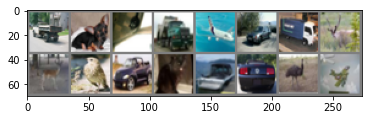

Epoch [1/10], Step [2000/3125], Loss: 2.2719
Epoch [2/10], Step [2000/3125], Loss: 2.0216
Epoch [3/10], Step [2000/3125], Loss: 1.8526
Epoch [4/10], Step [2000/3125], Loss: 1.7307
Epoch [5/10], Step [2000/3125], Loss: 1.6875
Epoch [6/10], Step [2000/3125], Loss: 1.4968
Epoch [7/10], Step [2000/3125], Loss: 1.5388
Epoch [8/10], Step [2000/3125], Loss: 1.1842
Epoch [9/10], Step [2000/3125], Loss: 1.6003
Epoch [10/10], Step [2000/3125], Loss: 1.2293
Finished Training
model accuracy: 762.56
Acccuracy for label 0 is: 55.2
Acccuracy for label 1 is: 60.6
Acccuracy for label 2 is: 31.7
Acccuracy for label 3 is: 27.1
Acccuracy for label 4 is: 34.5
Acccuracy for label 5 is: 40.7
Acccuracy for label 6 is: 62.3
Acccuracy for label 7 is: 54.0
Acccuracy for label 8 is: 52.2
Acccuracy for label 9 is: 58.3


ConvNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (lin1): Linear(in_features=400, out_features=120, bias=True)
  (lin2): Linear(in_features=120, out_features=10, bias=True)
)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def image_show(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))

  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

data_iter = iter(train_loader)
images, labels = data_iter.next()
image_show(torchvision.utils.make_grid(images))

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.lin1 = nn.Linear(5 * 16 * 5, 120)
    self.lin2 = nn.Linear(120, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = self.lin1(x)
    x = self.lin2(x)
    return x

model = ConvNet().to(device)
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
total_steps = len(train_loader)

model.train()
for e in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    optimizer.zero_grad() 
    images = images.to(device)
    labels = labels.to(device)

    out = model(images)
    loss = Loss(out, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print (f'Epoch [{e+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

#------------------- One way to save model --------------------------------------------#
path = '/content/drive/My Drive/ColabNotebooks/results/state_dict_model.pt'
#os.path.join(path, model.state_dict())
torch.save(model.state_dict(), path)



model.eval()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_correct_class = [0 for i in range(10)]
  n_samples_class = [0 for i in range(10)]

  for j, (images, labels) in enumerate(test_loader):
    images = images.to(device)
    labels = labels.to(device)

    out = model(images)
    _,preds = torch.max(out, 1)
    n_samples += 1
    n_correct +=(preds == labels).sum().item()
    
    for i in range(batch_size):
      label = labels[i]
      pred = preds[i]
      if pred == label:
        n_correct_class[labels[i]] += 1
      n_samples_class[labels[i]] += 1

  acc = n_correct * 100./n_samples
  print('model accuracy:', acc)

  for i in range(10):
    acc = n_correct_class[i] * 100. / n_samples_class[i]
    print('Acccuracy for label', i, 'is:', acc)

#-------------------------------------- Load model ------------------------------------#




I am not updating the below model with trained weights, so accuracy will be less. But at the end we will get accuracy like above model, means ConvNet() is not loosing its trained weight unless reinitialized the model. 

In [ ]:
Untrained_Model = ConvNet() 
Untrained_Model.eval()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_correct_class = [0 for i in range(10)]
  n_samples_class = [0 for i in range(10)]

  for j, (images, labels) in enumerate(test_loader):
    images = images.to(device)
    labels = labels.to(device)

    out = model(images)
    _,preds = torch.max(out, 1)
    n_samples += 1
    n_correct +=(preds == labels).sum().item()
    
    for i in range(batch_size):
      label = labels[i]
      pred = preds[i]
      if pred == label:
        n_correct_class[labels[i]] += 1
      n_samples_class[labels[i]] += 1

  acc = n_correct * 100./n_samples
  print('model accuracy:', acc)

  for i in range(10):
    acc = n_correct_class[i] * 100. / n_samples_class[i]
    print('Acccuracy for label', i, 'is:', acc)


model accuracy: 762.56
Acccuracy for label 0 is: 55.2
Acccuracy for label 1 is: 60.6
Acccuracy for label 2 is: 31.7
Acccuracy for label 3 is: 27.1
Acccuracy for label 4 is: 34.5
Acccuracy for label 5 is: 40.7
Acccuracy for label 6 is: 62.3
Acccuracy for label 7 is: 54.0
Acccuracy for label 8 is: 52.2
Acccuracy for label 9 is: 58.3


I will update the below model with trained weight, so it should give accuracy like the first model.

In [ ]:
Model = ConvNet() # This is not trained model
Model.load_state_dict(torch.load(path)) # The model is loaded with the trained weight
Model.eval()
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_correct_class = [0 for i in range(10)]
  n_samples_class = [0 for i in range(10)]

  for j, (images, labels) in enumerate(test_loader):
    images = images.to(device)
    labels = labels.to(device)

    out = model(images)
    _,preds = torch.max(out, 1)
    n_samples += 1
    n_correct +=(preds == labels).sum().item()
    
    for i in range(batch_size):
      label = labels[i]
      pred = preds[i]
      if pred == label:
        n_correct_class[labels[i]] += 1
      n_samples_class[labels[i]] += 1

  acc = n_correct * 100./n_samples
  print('model accuracy:', acc)

  for i in range(10):
    acc = n_correct_class[i] * 100. / n_samples_class[i]
    print('Acccuracy for label', i, 'is:', acc)

model accuracy: 762.56
Acccuracy for label 0 is: 55.2
Acccuracy for label 1 is: 60.6
Acccuracy for label 2 is: 31.7
Acccuracy for label 3 is: 27.1
Acccuracy for label 4 is: 34.5
Acccuracy for label 5 is: 40.7
Acccuracy for label 6 is: 62.3
Acccuracy for label 7 is: 54.0
Acccuracy for label 8 is: 52.2
Acccuracy for label 9 is: 58.3


# Transfer Learning
# Lecture 15

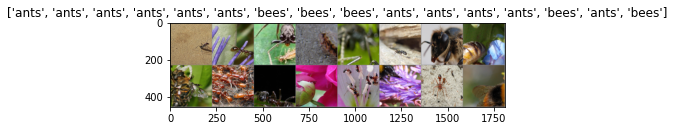

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
from torch.optim import lr_scheduler

import copy
import time

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25 ,0.25])

transform = {
    'train':transforms.Compose([
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean, std)                         
    ]),
    'val':transforms.Compose([
                              transforms.Resize(256),
                              transforms.CenterCrop(224),
                              transforms.ToTensor(),
                              transforms.Normalize(mean, std)
    ])
}

data_dir = '/content/drive/My Drive/ColabNotebooks/results/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), 
                                          transform[x]) for x in ['train', 'val']}
dataloaders = {x:torch.utils.data.DataLoader(image_datasets[x], batch_size = 16, shuffle = True)
               for x in ['train', 'val']}
data_size = {x:len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def img_show(img, title):
  img = img.numpy().transpose((1, 2, 0))
  inp = std * img + mean
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp)
  plt.title(title)
  plt.show()

images, classes = (iter(dataloaders['train'])).next()
out = torchvision.utils.make_grid(images)
img_show(out, title = [class_names[x] for x in classes])

1st approach to update the last layer with fine tuning the others parameters of the network 

In [ ]:
def train_model(model, criterion, optimizer, schedular, path, num_epochs = 25):
  since = time.time()
  best_model = copy.deepcopy(model.state_dict())
  best_acc = 0.
  for e in range(num_epochs):
    for phase in ['train', 'val']:
      if phase == 'train':
        model.train()
      else:
        model.eval()
      running_loss = 0.
      running_corrects = 0.
      for images, labels in dataloaders[phase]:
        images = images.to(device)
        labels = labels.to(device)

        with torch.set_grad_enabled(phase == 'train'):
          out = model(images)
          #print(out.shape, 'out', out.dtype)
          _, preds = torch.max(out, 1)
          #print(phase, 'preds')
          loss = criterion(out, labels)
          if phase == 'train':
            #print('dd')
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
          running_loss += loss.item() * images.size(0)
          running_corrects += (preds == labels.data).sum()
      if phase == 'train':
        schedular.step()
      epoch_loss = running_loss / data_size[phase]
      epoch_acc = running_corrects / data_size[phase]

      print('epoch:', e + 1, 'Loss:', epoch_loss, 'Acc:', epoch_acc, 'phase', phase)

      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        torch.save(model.state_dict(), path)

  print('Training Complete')
  time_lapse = time.time() - since
  print('time lapsed:', time_lapse)
  print('Best val acc:', best_acc)

  model.load_state_dict(torch.load(path))
  return model

model = models.resnet18(pretrained = True) # We will use pre trained weights
num_fetrs = model.fc.in_features # no of input features from the last layer or no of neurons in last layer
model.fc =nn.Linear(num_fetrs, 2)

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-3)
path = '/content/drive/My Drive/ColabNotebooks/results/state_dict_model.pt'
step_lr_schedular = lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)
model = train_model(model, criterion, optimizer, step_lr_schedular, path)




epoch: 1 Loss: 0.7022977207527786 Acc: tensor(0.5451) phase train
epoch: 1 Loss: 0.621767980990067 Acc: tensor(0.6732) phase val
epoch: 2 Loss: 0.6100992257477807 Acc: tensor(0.6926) phase train
epoch: 2 Loss: 0.5268073171571969 Acc: tensor(0.8105) phase val
epoch: 3 Loss: 0.5164351360719712 Acc: tensor(0.8279) phase train
epoch: 3 Loss: 0.46454091555152843 Acc: tensor(0.8562) phase val
epoch: 4 Loss: 0.4780131031255253 Acc: tensor(0.8115) phase train
epoch: 4 Loss: 0.4190218394098718 Acc: tensor(0.8562) phase val
epoch: 5 Loss: 0.4462089352920407 Acc: tensor(0.8238) phase train
epoch: 5 Loss: 0.3813404037671931 Acc: tensor(0.9281) phase val
epoch: 6 Loss: 0.40841398913352217 Acc: tensor(0.8607) phase train
epoch: 6 Loss: 0.35594138736818354 Acc: tensor(0.9346) phase val
epoch: 7 Loss: 0.39471580747698176 Acc: tensor(0.8648) phase train
epoch: 7 Loss: 0.32402273174984003 Acc: tensor(0.9412) phase val
epoch: 8 Loss: 0.357173855187463 Acc: tensor(0.9016) phase train
epoch: 8 Loss: 0.3053

2nd approac to update the last layer only

In [ ]:
# We need to freeze all the parameters aexcept the final layers
RseNet = models.resnet18(pretrained = True) # We will use pre trained weights
for param in RseNet.parameters():
  param.requires_grad = False
num_fetrs = RseNet.fc.in_features # no of input features from the last layer or no of neurons in last layer
RseNet.fc =nn.Linear(num_fetrs, 2)

RseNet = RseNet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(RseNet.parameters(), lr = 1e-3)
path = '/content/drive/My Drive/ColabNotebooks/results/state_dict_model2nd.pt'
step_lr_schedular = lr_scheduler.StepLR(optimizer, step_size = 10, gamma = 0.5)
RseNet = train_model(RseNet, criterion, optimizer, step_lr_schedular, path, num_epochs = 5)


epoch: 1 Loss: 0.7454308222551815 Acc: tensor(0.5246) phase train
epoch: 1 Loss: 0.7012728643573187 Acc: tensor(0.5098) phase val
epoch: 2 Loss: 0.6726972021040369 Acc: tensor(0.5943) phase train
epoch: 2 Loss: 0.653304292096032 Acc: tensor(0.6275) phase val
epoch: 3 Loss: 0.6025231226545865 Acc: tensor(0.6598) phase train
epoch: 3 Loss: 0.5790938286999472 Acc: tensor(0.7190) phase val
epoch: 4 Loss: 0.5498653493943761 Acc: tensor(0.7623) phase train
epoch: 4 Loss: 0.5459031754849004 Acc: tensor(0.7255) phase val
epoch: 5 Loss: 0.5270588358894723 Acc: tensor(0.7459) phase train
epoch: 5 Loss: 0.4974967788637074 Acc: tensor(0.8105) phase val
Training Complete
time lapsed: 185.44696688652039
Best val acc: tensor(0.8105)


# Tensorboard
#Lecture 16

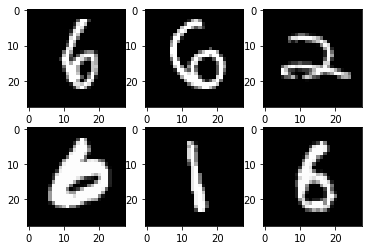

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#---------------------------- TENSORBOARD ---------------------------------------#
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
logs_base_dir = '/content/drive/My Drive/ColabNotebooks/results'
#logs_base_dir = 'runs'
writer = SummaryWriter(logs_base_dir) # just a path of folder

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

in_size = 28 * 28
hid_size = 500
out_size = 10
num_epochs = 10
batch_size = 64
lr = 1e-3

train_data = torchvision.datasets.MNIST(root = './data', 
                                        train = True, 
                                        download = True, 
                                        transform = transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root = './data', 
                                       train = False, 
                                       download = True, 
                                       transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 64, shuffle = True)

examples = iter(train_loader)
images, labels = examples.next()

for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(images[i][0], cmap = 'gray')
#plt.show()

In [4]:
# --------------------- TENSORBOARD ----------------------------#
img_grid = torchvision.utils.make_grid(images)
writer.add_image('mnist_images', img_grid)
writer.flush()

In [6]:
!tensorboard --logdir= 'logs_base_dir'

2020-10-23 12:45:26.454882: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--purge_orphaned_data BOOL] [--db URI] [--db_import]
                   [--inspect] [--version_tb] [--tag TAG] [--event_file PATH]
                   [--path_prefix PATH] [--window_title TEXT]
                   [--max_reload_threads COUNT] [--reload_interval SECONDS]
                   [--reload_task TYPE] [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [--debugger_data_server_grpc_port PORT]
                   [--debugger_port PORT]
                   [--whatif-use-unsafe-custom-prediction YOUR_CUSTOM_PREDICT_FUNCTION.py]
    

# Saving and Loading models
# Lecture 17

In [23]:
import torch
import torch.nn as nn 
import torch.functional as F
import torchvision
import numpy as np

class Check_model(nn.Module):
  def __init__(self, in_size, hid_size, out_size):
    super(Check_model, self).__init__()
    self.lin1 = nn.Linear(in_size, hid_size)
    self.lin2 = nn.Linear(hid_size, out_size)

  def forward(slf, x):
    out = self.lin1(x)
    out = self.lin2(out)
    return out

model = Check_model(4, 5, 2)

'''
# ------------------------ 3 ways to rmember  -------------------------------- #
torch.save(arg, path) # arg can be a dictionary, model or tensor and path is 'dir/some_name.pth'
torch.load(path)
torch.load_state_dict(arg)
'''

# ----------------------- Different way of saving -----------------------------#
#lazy way to save model
path = '/content/drive/My Drive/ColabNotebooks/results/model1.pth'
torch.save(model, path)
MODEL = torch.load(path)
MODEL.eval()
for param in MODEL.parameters():
  print(param)

#Reccomended way of doing it
path2 = '/content/drive/My Drive/ColabNotebooks/results/model_state_dict1.pth'
torch.save(model.state_dict(), path2)
LOADED_MODEL = Check_model(4, 5, 2)
LOADED_MODEL.load_state_dict(torch.load(path2))
LOADED_MODEL.eval()
for p in LOADED_MODEL.parameters():
  print(p)

print(model.state_dict())
print(LOADED_MODEL.state_dict())

lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
print(optimizer.state_dict())

path3 = '/content/drive/My Drive/ColabNotebooks/results/check_point1.pth'
check_point = {'epoch': 100, 'model_state':model.state_dict(), 'optim_state':optimizer.state_dict()} # must be a dictnary
torch.save(check_point, path3)

loaded_check_point = torch.load(path3)
num_epoch = loaded_check_point['epoch']
MODEL3 = Check_model(4, 5, 2)
OPTIMIZER = torch.optim.SGD(MODEL3.parameters(), lr = 0)
MODEL3.load_state_dict(check_point['model_state'])
OPTIMIZER.load_state_dict(check_point['optim_state'])
print(OPTIMIZER.state_dict())

'''
# If we use gpu to save and load model
device = torch.device('cuda')
model.to(device)
torch.save(model.state_dict(), path)

device = torch.device('cpu')
new_model = model(*args, **kwargs)
model.state_dict(torch.load(path, map_location = device))



Parameter containing:
tensor([[ 0.2258,  0.4592,  0.0175,  0.1997],
        [-0.2059,  0.2313, -0.2581, -0.4328],
        [-0.4853,  0.4210, -0.3003,  0.2248],
        [ 0.1996, -0.1872,  0.4029, -0.0737],
        [ 0.4091, -0.1881, -0.4611,  0.3159]], requires_grad=True)
Parameter containing:
tensor([-0.4364, -0.0566,  0.4972,  0.2467,  0.1768], requires_grad=True)
Parameter containing:
tensor([[-0.0793, -0.0280,  0.3283, -0.3943,  0.3286],
        [ 0.4442,  0.4052,  0.2962, -0.2473, -0.3162]], requires_grad=True)
Parameter containing:
tensor([-0.1672,  0.0996], requires_grad=True)
Parameter containing:
tensor([[ 0.2258,  0.4592,  0.0175,  0.1997],
        [-0.2059,  0.2313, -0.2581, -0.4328],
        [-0.4853,  0.4210, -0.3003,  0.2248],
        [ 0.1996, -0.1872,  0.4029, -0.0737],
        [ 0.4091, -0.1881, -0.4611,  0.3159]], requires_grad=True)
Parameter containing:
tensor([-0.4364, -0.0566,  0.4972,  0.2467,  0.1768], requires_grad=True)
Parameter containing:
tensor([[-0.0793, 